# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

In [1]:
# Importowanie Bibliotek
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Przygotowanie Danych
Wczytanie i przygotowanie danych treningowych, normalizacja danych, podział na zbiór treningowy i testowy.

In [2]:
# Przygotowanie Danych

# Wczytanie danych z pliku CSV
dane = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
kolumny_numeryczne = ['Size(L)', 'OG', 'FG', 'IBU', 'ABV', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = dane[kolumny_numeryczne].copy()

# Uzupełnienie brakujących wartości średnią
X = X.fillna(X.mean())

# Przygotowanie etykiet (kolor piwa)
y = dane['Color'].copy()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Wyświetlenie kształtu zbiorów danych
print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (59088, 9)
Kształt danych testowych: (14773, 9)
Kształt etykiet treningowych: (59088,)
Kształt etykiet testowych: (14773,)


# Utworzenie Modelu
Utworzenie modelu sieci neuronowej za pomocą Keras do regresji koloru piwa.

In [3]:
# Utworzenie Modelu
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Warstwa wejściowa
    keras.layers.Dense(64, activation='relu'),  # Warstwa ukryta
    keras.layers.Dense(32, activation='relu'),  # Warstwa ukryta
    keras.layers.Dense(1)  # Warstwa wyjściowa do regresji
])

# Kompilacja Modelu
model.compile(optimizer='adam',  # Użycie optymalizatora Adam
              loss='mean_squared_error',  # Funkcja straty do regresji
              metrics=['mean_absolute_error'])  # Metryka do oceny modelu

# Wyświetlenie podsumowania modelu
model.summary()  # Podsumowanie architektury modelu

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

# Kompilacja Modelu
Kompilacja modelu z optymalizatorem Adam i funkcją straty mean_squared_error.

In [4]:
# Kompilacja Modelu
model.compile(optimizer='adam',  # Użycie optymalizatora Adam
              loss='mean_squared_error',  # Funkcja straty do regresji
              metrics=['mean_absolute_error'])  # Metryka do oceny modelu

# Wyświetlenie podsumowania modelu
model.summary()  # Podsumowanie architektury modelu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie Modelu
Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha.

Epoch 1/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 162.0939 - mean_absolute_error: 9.1498 - val_loss: 124.9986 - val_mean_absolute_error: 8.9009
Epoch 2/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 127.9762 - mean_absolute_error: 8.5877 - val_loss: 122.5705 - val_mean_absolute_error: 8.4563
Epoch 3/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 124.4175 - mean_absolute_error: 8.4090 - val_loss: 120.8731 - val_mean_absolute_error: 8.3536
Epoch 4/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 123.2814 - mean_absolute_error: 8.3536 - val_loss: 119.2725 - val_mean_absolute_error: 8.0253
Epoch 5/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 122.0191 - mean_absolute_error: 8.2586 - val_loss: 118.6721 - val_mean_absolute_error: 8.2155
Epoch 6/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 121.6677 - mean_absolute_error: 8.3226 - val_loss: 118.7884 - val_mean_absolute_error: 8.1282
Epoch 7/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12

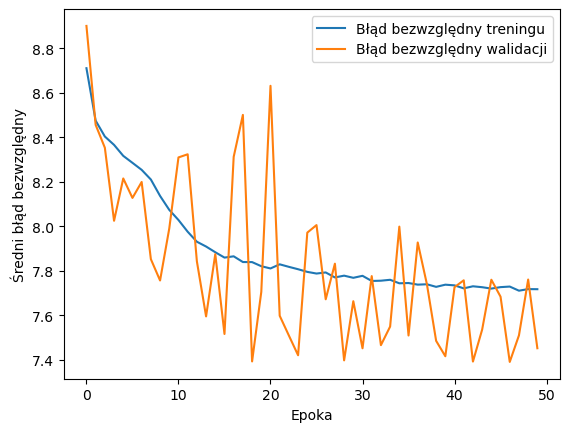

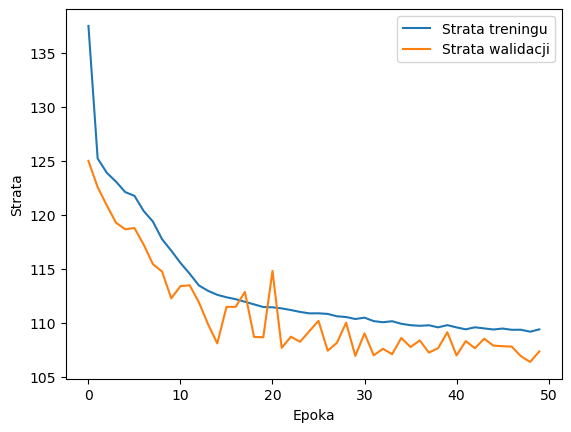

In [5]:
# Trenowanie Modelu

# Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha
historia = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Wykres średniego błędu bezwzględnego
plt.plot(historia.history['mean_absolute_error'], label='Błąd bezwzględny treningu')
plt.plot(historia.history['val_mean_absolute_error'], label='Błąd bezwzględny walidacji')
plt.xlabel('Epoka')
plt.ylabel('Średni błąd bezwzględny')
plt.legend()
plt.show()

# Wykres straty
plt.plot(historia.history['loss'], label='Strata treningu')
plt.plot(historia.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Testowanie i Ewaluacja
Ocena modelu na zbiorze testowym, obliczenie średniego błędu kwadratowego, wykres porównujący rzeczywiste i przewidywane wartości.

462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 116.3981 - mean_absolute_error: 7.7051
Testowa Strata: 115.2919921875
Testowy Średni Błąd Bezwzględny: 7.681109428405762
462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
Średni Błąd Kwadratowy: 115.29199688294173


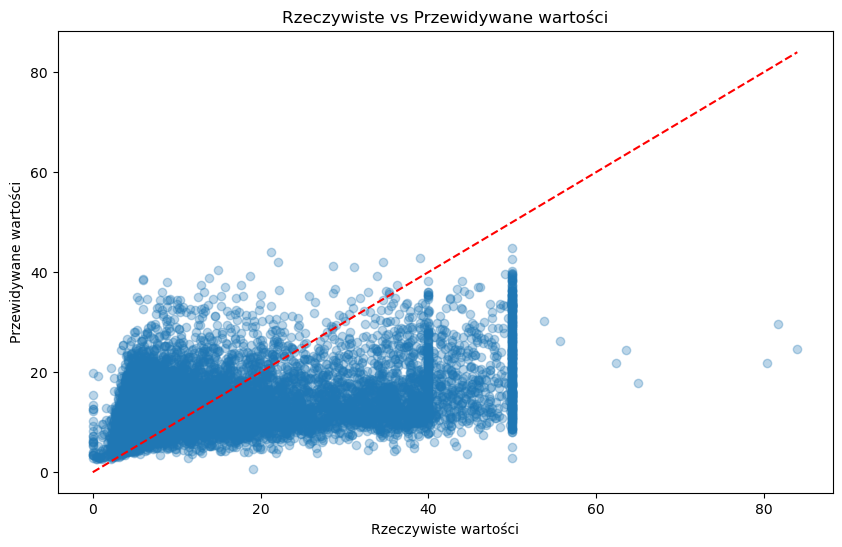

In [6]:
# Testowanie i Ewaluacja

# Ocena modelu na zbiorze testowym
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Testowa Strata: {test_loss}')
print(f'Testowy Średni Błąd Bezwzględny: {test_mae}')

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie średniego błędu kwadratowego
mse = mean_squared_error(y_test, y_pred)
print(f'Średni Błąd Kwadratowy: {mse}')

# Wykres porównujący rzeczywiste i przewidywane wartości
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()

# Zapisywanie Modelu
Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania, wczytanie modelu z pliku i ocena jego działania.

In [7]:
# Zapisywanie Modelu

# Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania
model.save('model_regresji_koloru_piwa.h5')

# Wczytanie modelu z pliku
wczytany_model = keras.models.load_model('model_regresji_koloru_piwa.h5')

# Sprawdzenie, czy wczytany model działa poprawnie
wczytany_model.summary()

# Ocena wczytanego modelu na zbiorze testowym
wczytany_test_loss, wczytany_test_mae = wczytany_model.evaluate(X_test, y_test)

print(f'Wczytana Testowa Strata: {wczytany_test_loss}')
print(f'Wczytany Testowy Średni Błąd Bezwzględny: {wczytany_test_mae}')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,651 (45.52 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 116.3981 - mean_absolute_error: 7.7051
Wczytana Testowa Strata: 115.2919921875
Wczytany Testowy Średni Błąd Bezwzględny: 7.681109428405762


# Przewidywanie Koloru Piwa
Przewidywanie koloru piwa dla różnych stylów piwa na podstawie wytrenowanego modelu.

In [8]:
# Przewidywanie Koloru Piwa

# Wczytanie modelu
model = keras.models.load_model('model_regresji_koloru_piwa.h5')

# Wczytanie rzeczywistych danych treningowych do dopasowania skalera
dane_treningowe = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
kolumny_numeryczne = ['Size(L)', 'OG', 'FG', 'IBU', 'ABV', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
dane_treningowe = dane_treningowe[kolumny_numeryczne]

# Uzupełnienie brakujących wartości średnią
dane_treningowe = dane_treningowe.fillna(dane_treningowe.mean())

# Normalizacja danych treningowych
scaler = StandardScaler()
scaler.fit(dane_treningowe)

def przewiduj_kolor_piwa(dane_piwa):
    # Przekształcenie danych wejściowych do odpowiedniego formatu
    df = pd.DataFrame([dane_piwa])
    
    # Normalizacja danych
    df_scaled = scaler.transform(df)
    
    # Przewidywanie koloru piwa
    predykcja = model.predict(df_scaled)
    
    return predykcja[0][0]

# Przykładowe dane dla różnych stylów piwa
piwa = {
    'IPA': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.015, 'IBU': 60, 'ABV': 6.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75},
    'Stout': {'Size(L)': 20.0, 'OG': 1.075, 'FG': 1.020, 'IBU': 40, 'ABV': 7.0, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.070, 'Efficiency': 75},
    'Pilsner': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 30, 'ABV': 5.0, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Wheat': {'Size(L)': 20.0, 'OG': 1.055, 'FG': 1.012, 'IBU': 20, 'ABV': 5.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.050, 'Efficiency': 75},
    'APA': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 35, 'ABV': 5.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Barleywine': {'Size(L)': 20.0, 'OG': 1.100, 'FG': 1.025, 'IBU': 80, 'ABV': 10.0, 'BoilSize': 25.0, 'BoilTime': 90, 'BoilGravity': 1.095, 'Efficiency': 75},
    'Saison': {'Size(L)': 20.0, 'OG': 1.060, 'FG': 1.008, 'IBU': 25, 'ABV': 6.0, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.055, 'Efficiency': 75},
    'Porter': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.018, 'IBU': 35, 'ABV': 6.5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75}
}

# Przewidywanie koloru piwa dla każdego stylu piwa
for styl, dane_piwa in piwa.items():
    kolor_piwa = przewiduj_kolor_piwa(dane_piwa)
    print(f'Styl: {styl}, Przewidywany kolor piwa: {kolor_piwa:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Styl: IPA, Przewidywany kolor piwa: 11.42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Styl: Stout, Przewidywany kolor piwa: 21.62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Styl: Pilsner, Przewidywany kolor piwa: 9.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Styl: Wheat, Przewidywany kolor piwa: 9.57
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Styl: APA, Przewidywany kolor piwa: 10.21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Styl: Barleywine, Przewidywany kolor piwa: 34.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Styl: Saison, Przewidywany kolor piwa: 9.14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Styl: Porter, Przewidywany kolor piwa: 18.76
